In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from matplotlib.table import Table

In [2]:
data = pd.read_csv('tcc_ceds_music.csv')

In [3]:
data.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [4]:
songs = pd.DataFrame()
songs['title'] = data['track_name']+" "+" by "+data['artist_name']
songs['angry'] = np.array([1-data['violence'],1-data['loudness'],data['acousticness'],data['valence']]).T.tolist()
songs['Fear'] = np.array([data['light/visual perceptions'],1-data['violence'],data['family/spiritual'],1-data['loudness']]).T.tolist()
songs['happy'] = np.array([data['loudness'],data['instrumentalness'],data['danceability']],data['valence']).T.tolist()
songs ['neutral'] = np.array([data['acousticness'],1-data['sadness'],data['dating'],data['music']]).T.tolist()
songs['sad'] = np.array([data['valence'],1-data['sadness'],1-data['loudness'],1-data['danceability']]).T.tolist()
songs['surprise'] = np.array([data['movement/places'],data['loudness'],data['danceability'],data['romantic']]).T.tolist()

In [5]:
songs.head()

,title,angry,Fear,happy,neutral,sad,surprise
0,mohabbat bhi jhoothi by mukesh,"[0.9362538723885007, 0.5458810860703024, 0.997...","[0.0005980861380272, 0.9362538723885007, 0.000...","[0.4541189139296976, 0.901821862348178, 0.3577...","[0.9979919658553876, 0.619701104769667, 0.0005...","[0.3394476504534212, 0.619701104769667, 0.5458...","[0.000598086192264, 0.4541189139296976, 0.3577..."
1,i believe by frankie laine,"[0.9032232577217031, 0.35246006717432, 0.95481...","[0.2126810671851602, 0.9032232577217031, 0.051...","[0.64753993282568, 1.5283400809716598e-06, 0.3...","[0.9548192317462166, 0.9987163028699731, 0.035...","[0.3250206100577081, 0.9987163028699731, 0.352...","[0.0012836970925897, 0.64753993282568, 0.33174..."
2,cry by johnnie ray,"[0.9972299167830492, 0.414711688844448, 0.8403...","[0.0027700833214308, 0.9972299167830492, 0.002...","[0.585288311155552, 0.0, 0.4562980613018521]","[0.8403612855032989, 0.9972299168091714, 0.002...","[0.3518136850783182, 0.9972299168091714, 0.414...","[0.0027700834662438, 0.585288311155552, 0.4562..."
3,patricia by pérez prado,"[0.9984520123523506, 0.2555957234058919, 0.083...","[0.0015479877229543, 0.9984520123523506, 0.001...","[0.7444042765941081, 0.1993927125506072, 0.686...","[0.0839348232277341, 0.7741105157796727, 0.048...","[0.7753503709810387, 0.7741105157796727, 0.255...","[0.1292497848687442, 0.7444042765941081, 0.686..."
4,apopse eida oneiro by giorgos papadopoulos,"[0.9986504722892822, 0.35351126836397206, 0.97...","[0.0013495277971729, 0.9986504722892822, 0.029...","[0.6464887316360279, 0.000245951417004, 0.2916...","[0.9759035902646488, 0.9311998483716291, 0.001...","[0.597073371805441, 0.9311998483716291, 0.3535...","[0.0013495277127997, 0.6464887316360279, 0.291..."


In [6]:
songs['angry'] = songs['angry'].apply(lambda x: np.mean(np.array(x)))
songs['Fear'] = songs['Fear'].apply(lambda x: np.mean(np.array(x)))
songs['happy'] = songs['happy'].apply(lambda x: np.mean(np.array(x)))
songs['neutral'] = songs['neutral'].apply(lambda x: np.mean(np.array(x)))
songs['sad'] = songs['sad'].apply(lambda x: np.mean(np.array(x)))
songs['surprise'] = songs['surprise'].apply(lambda x: np.mean(np.array(x)))

In [7]:
songs.head()

,title,angry,Fear,happy,neutral,sad,surprise
0,mohabbat bhi jhoothi by mukesh,0.704894,0.370833,0.571226,0.414395,0.536823,0.207390
1,i believe by frankie laine,0.633881,0.379872,0.326429,0.526777,0.586113,0.245463
2,cry by johnnie ray,0.651029,0.354370,0.347195,0.541039,0.576864,0.300730
3,patricia by pérez prado,0.528333,0.314286,0.543596,0.226961,0.529516,0.493046
4,apopse eida oneiro by giorgos papadopoulos,0.731285,0.345816,0.312802,0.477451,0.647528,0.350735


In [8]:
songs['values'] = np.array([songs['angry'],songs['Fear'],songs['happy'],songs['neutral'],songs['sad'],songs['surprise']]).T.tolist()

In [15]:
songs.to_csv('songs.csv', index=False)


In [9]:
def calculate_cosine_similarity(vec1, vec2):
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)

    if norm_vec1 == 0 or norm_vec2 == 0:
        return 0.0
    cosine_sim = dot_product / (norm_vec1 * norm_vec2)
    return cosine_sim

In [10]:
per = np.load("../main_files/emotion_all.npy")
avg = np.average(per, axis=0)
avg = np.float64(avg)

In [11]:

songs['score'] = songs['values'].apply(lambda x: calculate_cosine_similarity(x, avg))

In [12]:
songs = songs.sort_values("score", ascending=False)
top_10_titles = songs["title"].head(10).to_list()
np.save("../main_files/song_rec.npy", top_10_titles)

In [13]:
print(top_10_titles)

["sunrise drive  by l'indécis", 'high tide  by danny black', 'clair de lune  by kamasi washington', 'azalea  by deeb', 'cannons  by youth lagoon', 'the drag  by ty segall', 'lay it down  by cowboy junkies', 'the burning spear (live)  by sonic youth', 'rip up the streets  by the spits', 'mutual slump  by dj shadow']


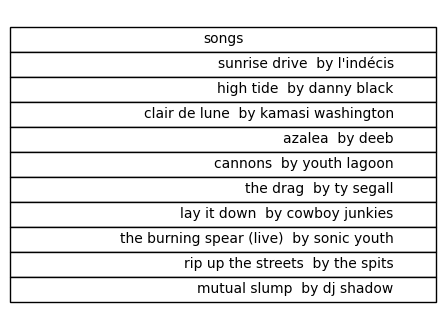

In [14]:
df = pd.DataFrame(top_10_titles, columns=['songs'])

# Configure the plot
fig, ax = plt.subplots(figsize=(5.5, 4))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

